In [1]:
# Some weirdness going on with my conda env, so installing here
!python3 -m pip install git+https://github.com/NHERI-SimCenter/BrailsPlusPlus

  Cloning https://github.com/NHERI-SimCenter/BrailsPlusPlus to /private/var/folders/9s/bjy1xb116nq825d_whd6mr0m0000gn/T/pip-req-build-j_sdw49t
  Running command git clone --filter=blob:none --quiet https://github.com/NHERI-SimCenter/BrailsPlusPlus /private/var/folders/9s/bjy1xb116nq825d_whd6mr0m0000gn/T/pip-req-build-j_sdw49t
  Resolved https://github.com/NHERI-SimCenter/BrailsPlusPlus to commit 09ada6c01ebb72b9a8b97b7958a540759e27b1a1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
%matplotlib inline
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import pandas as pd
import numpy as np
import glob
import json
import cv2
import glob
os.environ["OPENCV_LOG_LEVEL"]="SILENT"



## Inventory Processing

In [5]:
import os
import sys
from brails import Importer
from brails.types.image_set import ImageSet 


# sys.path.insert(1, "../../")

# This script needs a Google API Key to run.
# We suggest placing your API key in file apiKey.txt in the same directory as 
# this script if you plan to commit changes to this example. This way, you do 
# not risk accidentally uploading your API key (apiKey.txt is in .gitignore, 
# so you have work to do to get it uploaded)

apiKey = ""
apiTxtFullPath = "/Users/noellelaw/Desktop/CERALab/BuildingClassificationDataset/BrailsPlusPlusRoofClassification/apiKey.txt"
if os.path.exists(apiTxtFullPath):
    with open(apiTxtFullPath, "r") as file:
        apiKey = file.readline().strip()  # Read the first line and strip whitespace
# Create the importer:
importer = Importer()

# Regions
regions = [
    "Honolulu, HI", "San Juan, PR", "Tiburon, CA", "Manhattan, NY", 
]
for region in regions:
      # Select a region and create its RegionBoundary:
      region_data = {"type": "locationName", "data": region}
      region_boundary_class = importer.get_class("RegionBoundary")
      region_boundary_object = region_boundary_class(region_data)

      # Get AssetInventory for buildings in the defined region via 
      # USA_FootprintScraper:
      print("Running USA_FootprintsScraper...")

      usa_class = importer.get_class("USA_FootprintScraper")
      usa_data = {"length": "ft"}
      instance2 = usa_class(usa_data)
      usa_inventory = instance2.get_footprints(region_boundary_object)

      print("\nTotal number of assets detected using FEMA USA Structures data: "
            , len(usa_inventory.inventory))

      # Subsample from the extracted assets to keep the image downloading step quick.
      # Here, we are randomly sampling 15 buildings using a random seed value of 40:
      small_inventory = usa_inventory.get_random_sample(100, 40)
      print("Number of assets in the selected subset: ", 
            len(small_inventory.inventory))
      
      # Get aerial imagery for the selected subset using GoogleSatellite:
      google_satellite_class = importer.get_class("GoogleSatellite")
      google_satellite = google_satellite_class()
      images_satellite = google_satellite.get_images(small_inventory, "tmp/satellite/")

Running USA_FootprintsScraper...

Searching for Honolulu, HI...
Found Honolulu, Honolulu County, Hawaii, United States

Meshing the defined area...


Obtaining the number of elements in each cell: 100%|██████████| 47/47 [00:01<00:00, 41.89it/s]



Meshing complete. Split Honolulu into {len(final_cells)} cells


100%|██████████| 71/71 [00:00<00:00, 30668.96it/s]



Found a total of 72063 building footprints in Honolulu


INFO:brails.scrapers.google_satellite.google_satellite:Images will be saved to: /Users/noellelaw/Desktop/CERALab/BuildingClassificationDataset/BrailsPlusPlus/examples/image_processor/tmp/satellite



Total number of assets detected using FEMA USA Structures data:  72063
Number of assets in the selected subset:  100


Obtaining satellite imagery: 100%|██████████| 100/100 [00:02<00:00, 33.68it/s]


Running USA_FootprintsScraper...

Searching for San Juan, PR...
Found San Juan, Puerto Rico, United States

Meshing the defined area...


Obtaining the number of elements in each cell: 100%|██████████| 48/48 [00:01<00:00, 39.24it/s]



Meshing complete. Split San Juan into {len(final_cells)} cells


100%|██████████| 77/77 [00:00<00:00, 31672.20it/s]



Found a total of 84828 building footprints in San Juan


INFO:brails.scrapers.google_satellite.google_satellite:Images will be saved to: /Users/noellelaw/Desktop/CERALab/BuildingClassificationDataset/BrailsPlusPlus/examples/image_processor/tmp/satellite



Total number of assets detected using FEMA USA Structures data:  84828
Number of assets in the selected subset:  100


Obtaining satellite imagery: 100%|██████████| 100/100 [00:02<00:00, 46.27it/s]


Running USA_FootprintsScraper...

Searching for Tiburon, CA...
Found Tiburon, Marin County, California, 94920, United States

Meshing the defined area...


Obtaining the number of elements in each cell: 100%|██████████| 7/7 [00:00<00:00, 24.47it/s]



Meshing complete. Split Tiburon into {len(final_cells)} cells


100%|██████████| 6/6 [00:00<00:00, 45507.82it/s]
INFO:brails.scrapers.google_satellite.google_satellite:Images will be saved to: /Users/noellelaw/Desktop/CERALab/BuildingClassificationDataset/BrailsPlusPlus/examples/image_processor/tmp/satellite



Found a total of 3574 building footprints in Tiburon

Total number of assets detected using FEMA USA Structures data:  3574
Number of assets in the selected subset:  100


Obtaining satellite imagery: 100%|██████████| 100/100 [00:02<00:00, 46.27it/s]


Running USA_FootprintsScraper...

Searching for Manhattan, NY...
Found Manhattan, New York County, New York, United States

Meshing the defined area...


Obtaining the number of elements in each cell: 100%|██████████| 19/19 [00:00<00:00, 37.64it/s]



Meshing complete. Split Manhattan into {len(final_cells)} cells


100%|██████████| 17/17 [00:00<00:00, 51186.77it/s]



Found a total of 9328 building footprints in Manhattan


INFO:brails.scrapers.google_satellite.google_satellite:Images will be saved to: /Users/noellelaw/Desktop/CERALab/BuildingClassificationDataset/BrailsPlusPlus/examples/image_processor/tmp/satellite



Total number of assets detected using FEMA USA Structures data:  9328
Number of assets in the selected subset:  100


Obtaining satellite imagery: 100%|██████████| 100/100 [00:09<00:00, 10.23it/s]


In [ ]:
from brails.processors.vlm_image_classifier.CLIPClassifier import CLIPClassifier
from typing import Optional

class RoofMaterialLLM(CLIPClassifier):

        """
        The BuildingMaterialLLM classifier attempts to predict building materials  using large language models.

        Variables
        
        Methods:
        predict(ImageSet): To return the predictions for the set of images provided

        """
        
        def __init__(self, input_dict: Optional[dict] =None):
            
            """
            The class constructor sets up the path prompts or whatever.
            
            Args
                input_data: dict Optional. The init function looks into dict for values needed, e.g. path to prompts
            """
            super().__init__(input_dict = input_dict)
            self.input_dict = input_dict
            if(self.input_dict!=None):
                self.text_prompts = self.args['prompts']
                self.classes = self.args['classes']
            else:
                self.text_prompts = [
                    'thatch, in which tatch elements look very small and semi-ridged',
                    'green vegetation, in which green elements look small and non-uniform',
                    'limestone slates, in which limestone elements look small and ridged',
                    'stone slates, in which stone elements look small and ridged',
                    'clay tiles, in which clay elements look small and ridged',
                    'asphalt tiles, in which asphalt elements look small and ridged',
                    'concrete tiles, in which concrete elements look small and ridged',
                    'wood tiles, in which wood elements look small and ridged',
                    'metal sheet materials, in which metal elements look large and ridged or corrugated with vertical and horizontal overlaps or laid in large panels',
                    'polycarbonate sheet materials, in which polycarbonate elements look large and ridged or corrugated with vertical and horizontal overlaps or laid in large panels, and are clear or painted',
                    'glass sheet materials, in which glass elements look large and ridged or corrugated with vertical and horizontal overlaps or laid in large panels and transparent',
                    'amorphous concrete, in which concrete is a single element covering entire roof',
                    'amorphous asphalt, in which asphalt is a single element covering entire roof',
                    'amorphous membrane, in which membrane is a single element covering entire roof and could include rubber roofing, thermoplastic polyolefin, PVC',
                    'amorphous fabric, in which fabric is a single element covering entire roof and stretched over a frame',
                ]
                self.classes = [
                    'thatch', 'green/vegetation', 'limestone slates', 'stone slates', 
                    'clay tiles', 'asphalt tiles', 'concrete tiles', 'wood tiles', 'asphalt tiles', 
                    'concrete tiles', 'wood tiles', 'metal sheet materials', 'polycarbonate sheet materials',
                    'glass sheet materials', 'amorphous concrete', 'amorphous asphalt', 'amorphous membrane', 
                    'amorphous fabric', 
                    ]
            self.template = "a photo of a building with a roof made of {}." 

In [7]:
'''
Purpose: Predict buillding attributes
'''

print('Building Material PREDICTIONS')
my_class = importer.get_class('BuildingMaterialLLM')
my_classifier = my_class()
predictions = my_classifier.predict(images_satellite)
print(predictions)


Building Material PREDICTIONS
{1: 'concrete', 2: 'masonry', 3: 'steel', 4: 'manufactured', 5: 'manufactured', 6: 'manufactured', 7: 'wood', 8: 'masonry', 9: 'manufactured', 10: 'wood', 11: 'wood', 12: 'concrete'}


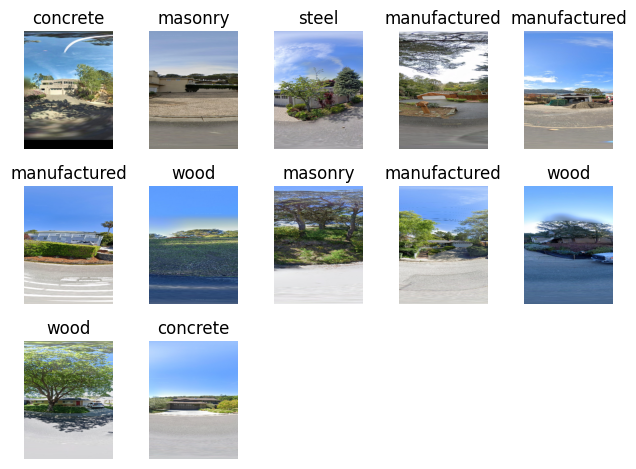

In [8]:
# RoofShape Classification
%matplotlib inline
plt.figure()
curr_dir = "tmp/street/"

for idx, (key, img) in enumerate(images_satellite.images.items()):
    filename = img.filename
    img_path = os.path.join(curr_dir, filename)
    img = mpimg.imread(img_path)    
    img = cv2.resize(img, (360, 480), interpolation = cv2.INTER_LINEAR)
    pred = predictions[key]
    plt.subplot(3, 5, idx+1)
    plt.imshow(img, cmap='gray')
    plt.title(pred)
    plt.axis('off')
plt.tight_layout()
plt.margins(0,0)
plt.show()